Solving 2D, Linearized SWE Gravity Wave Subsystem:
\begin{align*}
\partial_t u &= -c\ \partial_x h \\
\partial_t v &= -c\ \partial_y h \\
\partial_t h &= -c\ \left( \partial_x u + \partial_y v \right) \,.
\end{align*}

Assuming the appropriate smoothness, we can write the above as the two-way wave equation in 2D:
$$ \partial_t^2 h = c^2\ \Delta h \,. $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setup state

class State:
    def __init__(self):
        self.u = np.zeros([M, N])  # x-velocity
        self.v = np.zeros([M, N])  # y-velocity
        self.h = np.zeros([M, N])  # mass
    # END __init__()

    def __add__(self, other):
        new = State()
        new.u = self.u + other.u
        new.v = self.v + other.v
        new.h = self.h + other.h
        return new
    # END __add__()

    def __mul__(self, other):
        new = State()
        new.u = other * self.u
        new.v = other * self.v
        new.h = other * self.h
        return new
    # END __mul__()
    __rmul__ = __mul__
# END class State

In [3]:
# loop based tendency routine

def rhs(state):
    rhs = State()

    for i in range(1, M-1):
        for j in range(1, N-1):
            rhs.u[i,j] = state.h[i+1,j] - state.h[i-1,j]
            rhs.v[i,j] = state.h[i,j+1] - state.h[i,j-1]
            rhs.h[i,j] = ( state.u[i+1,j] - state.u[i-1,j] ) / dx + \
                         ( state.v[i,j+1] - state.v[i,j-1] ) / dy
        # END for
    # END for

    rhs.u = ( -c / (2*dx) ) * rhs.u
    rhs.v = ( -c / (2*dy) ) * rhs.v
    rhs.h = ( -c / 2 ) * rhs.h

    return rhs
# END rhs()

In [4]:
# RK4

def RK4step(state):
    s1 = rhs(state)

    s2 = rhs( state + (dt/2)*s1 )

    s3 = rhs( state + (dt/2)*s2 )

    s4 = rhs( state + dt*s3 )

    return ( state + (dt/6)*( s1 + 2*s2 + 2*s3 + s4 ) )
# END RK4

In [42]:
### setup parameters

c = 1  # wave propigation speed


### setup uniform cartesian grid 

dx = 0.05
dy = 0.05

xgrid = np.arange(0, 1+dx, dx)
ygrid = np.arange(0, 1+dy, dy)

x, y = np.meshgrid(xgrid, ygrid)

M = len(xgrid)
N = len(ygrid)


### setup time-stepping

dt = 0.01
nsteps = 20


### create state and initialize 

state = State()
state.h = 0.1 * np.exp( -25*( (x - 0.5)**2 + (y - 0.5)**2 ) )

In [43]:
# time-step with RK4

for step in range(0, nsteps):
    state = RK4step(state)
# END for

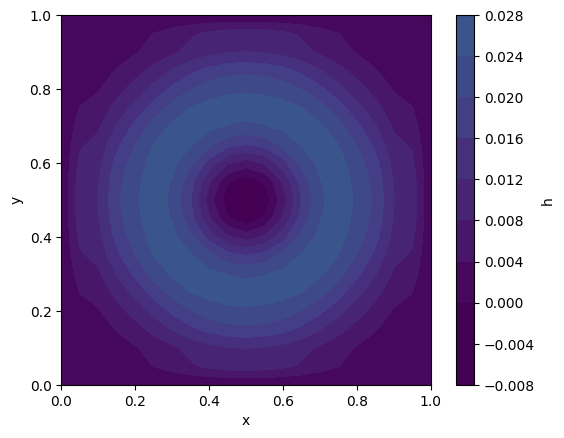

In [54]:
# visualization

fig, ax = plt.subplots()
cs = ax.contourf(x, y, state.h, vmin=0, vmax=0.1)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_aspect('equal')

cbar = fig.colorbar(cs)
cbar.set_label('h')


plt.show()